# Masking & ROI

First Step is to apply Mask and take out our Region Of Interest 

In [4]:
import matplotlib.pylab as plt
import cv2
import numpy as np

In [5]:
image = cv2.imread('road.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape)
height = image.shape[0]
width = image.shape[1]

region_of_interest_vertices = [
    (0, height),
    (width/2, height/2),
    (width, height)
]


(260, 474, 3)


In [6]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    channel_count = img.shape[2] #Color Channels
    match_mask_color = (255,) * channel_count
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask) # This bitwise_and will return only the matched mask image
    return masked_image

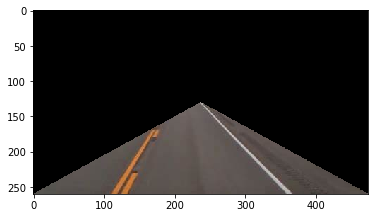

In [7]:
cropped_image = region_of_interest(image,
                np.array([region_of_interest_vertices], np.int32),)

plt.imshow(cropped_image)
plt.show()

# Detecting The Edges And Drawing the Lines

To find out edges and applying Hough Line Transform to draw the lines.

In [8]:
import matplotlib.pylab as plt
import cv2
import numpy as np

In [9]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2] 
    match_mask_color = 255 # As we are taking gray scale image as input so we dont need channel count here now.
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


In [10]:
def draw_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8) #img.shape[0] - height, img.shape[1] - width and 3 is color channels.

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)
    
    # For merging the blank image with the original image
    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0) #  0.8 is alpha (weight of first image) and 1 is beta(weight of second image) 0.0 is gama 
    return img



In [11]:
image = cv2.imread('road.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
height = image.shape[0]
width = image.shape[1]

region_of_interest_vertices = [
    (0, height),
    (width/2, height/2),
    (width, height)
]


gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(gray_image, 100, 200)
cropped_image = region_of_interest(canny_image,
                np.array([region_of_interest_vertices], np.int32),)


(260, 474, 3)


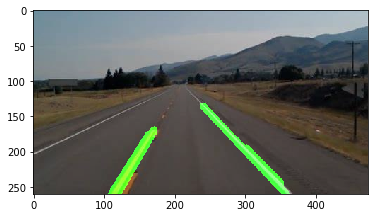

In [12]:
# Applying Hough Line transform to draw the lines on the detected edges
lines = cv2.HoughLinesP(cropped_image,
                        rho=6,
                        theta=np.pi/180,
                        threshold=160,
                        lines=np.array([]),
                        minLineLength=40,
                        maxLineGap=25)
image_with_lines = draw_the_lines(image, lines)
plt.imshow(image_with_lines)
plt.show()

# Detecting These lines in a video 

In [ ]:
import matplotlib.pylab as plt
import cv2
import numpy as np

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def drow_the_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0, 255, 0), thickness=10)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img

# = cv2.imread('road.jpg')
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
def process(image):
    print(image.shape)
    height = image.shape[0]
    width = image.shape[1]
    region_of_interest_vertices = [
        (0, height),
        (width/2, height/2),
        (width, height)
    ]
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    canny_image = cv2.Canny(gray_image, 100, 120)
    cropped_image = region_of_interest(canny_image,
                    np.array([region_of_interest_vertices], np.int32),)
    lines = cv2.HoughLinesP(cropped_image,
                            rho=2,
                            theta=np.pi/180,
                            threshold=50,
                            lines=np.array([]),
                            minLineLength=40,
                            maxLineGap=100)
    image_with_lines = drow_the_lines(image, lines)
    return image_with_lines

cap = cv2.VideoCapture('test.mp4')

while cap.isOpened(): #This function will return 2 variables ret and frame 
    ret, frame = cap.read()
    frame = process(frame)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'): #0xFF - Cross Platform Functionality
        break

cap.release()
cv2.destroyAllWindows()